In [4]:
import nltk
nltk.download('punkt', download_dir='C:/nltk_data')
nltk.download('stopwords', download_dir='C:/nltk_data')
nltk.data.path.append('C:/nltk_data')

[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

C:\Users\sandy\AppData\Local\Temp\ipykernel_24772\769576203.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Ticket Type', order=df['Ticket Type'].value_counts().index, palette='Set2')


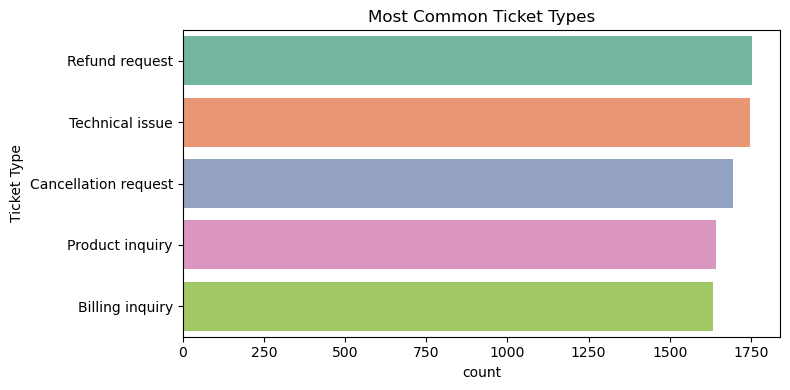

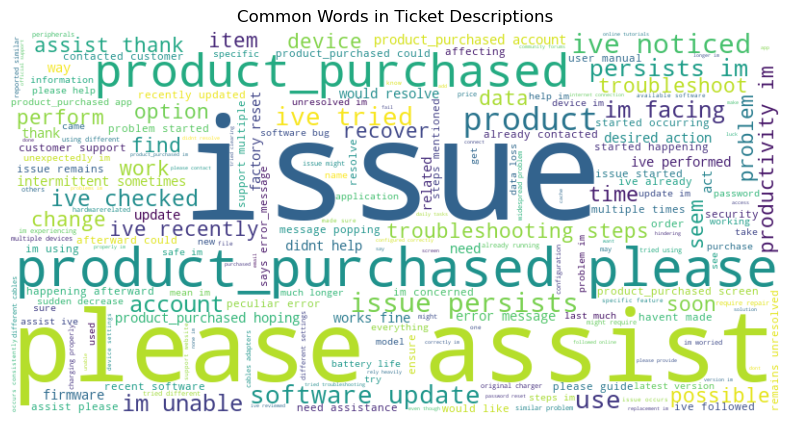

C:\Users\sandy\AppData\Local\Temp\ipykernel_24772\769576203.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ticket Priority', order=['Low','Medium','High','Critical'], palette='Set1')


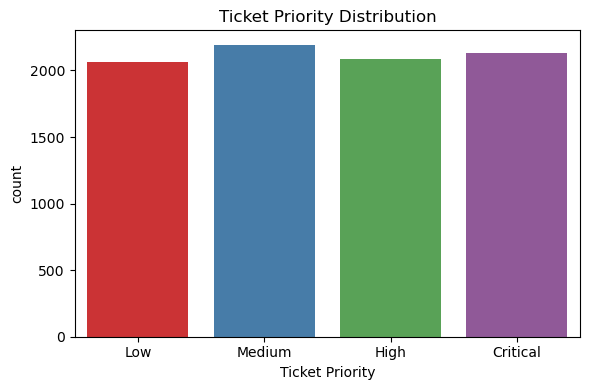

C:\Users\sandy\AppData\Local\Temp\ipykernel_24772\769576203.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Sentiment', palette='coolwarm')


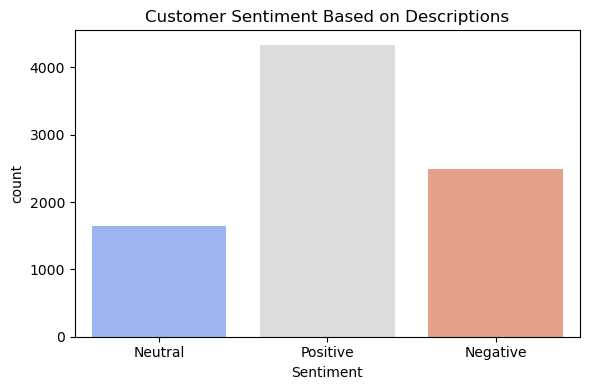

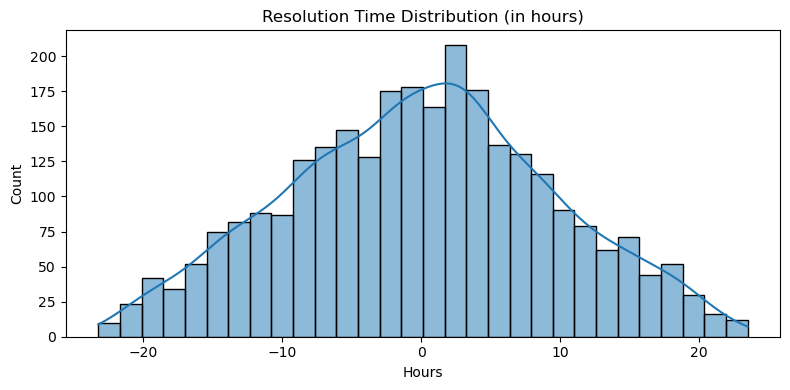

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
csv_file_path = "customer_support_tickets.csv"
df = pd.read_csv(csv_file_path)

print(df.head())

df['Ticket Description'] = df['Ticket Description'].astype(str).str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', x))

df_clean = df.dropna(subset=['Ticket Description'])

df_clean['Polarity'] = df_clean['Ticket Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_clean['Sentiment'] = df_clean['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

plt.figure(figsize=(8,4))
sns.countplot(data=df, y='Ticket Type', order=df['Ticket Type'].value_counts().index, palette='Set2')
plt.title("Most Common Ticket Types")
plt.tight_layout()
plt.show()

text = " ".join(df_clean['Ticket Description'].astype(str).tolist())
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=set(stopwords.words('english'))
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Ticket Descriptions")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Ticket Priority', order=['Low','Medium','High','Critical'], palette='Set1')
plt.title("Ticket Priority Distribution")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Sentiment', palette='coolwarm')
plt.title("Customer Sentiment Based on Descriptions")
plt.tight_layout()
plt.show()

resolved = df.dropna(subset=['Time to Resolution', 'First Response Time']).copy()
resolved['Time to Resolution'] = pd.to_datetime(resolved['Time to Resolution'], errors='coerce')
resolved['First Response Time'] = pd.to_datetime(resolved['First Response Time'], errors='coerce')
resolved = resolved.dropna(subset=['Time to Resolution', 'First Response Time'])

resolved['Resolution Hours'] = (resolved['Time to Resolution'] - resolved['First Response Time']).dt.total_seconds() / 3600

plt.figure(figsize=(8,4))
sns.histplot(resolved['Resolution Hours'], bins=30, kde=True)
plt.title("Resolution Time Distribution (in hours)")
plt.xlabel("Hours")
plt.tight_layout()
plt.show()
